In [42]:
import random
import matplotlib.pyplot as plt
import numpy as np

In [43]:
def generate_random_value():
    return random.randint(0,1)

In [44]:
def evaluation(individual):
    return sum(individual)

In [45]:
def cross_over(individual_1, individual_2, rate = 0.9):
    list_1 = individual_1.copy()
    list_2 = individual_2.copy()

    for i in range(len(list_1)):
        if random.random() < rate:
            list_1[i],list_2[i] = list_2[i], list_1[i]

    return (list_1, list_2)

In [46]:
def mutate(individual_1, rate=0.05):
    return [1 - val if random.random() < rate else val for val in individual_1]

In [47]:
m = 100
n = 100
population = [[generate_random_value() for _ in range(n)] for _ in range(m)]
population = np.array(population).shape

In [48]:
m = 100
n = 100
generation = 100
elitism = 2

population = [[generate_random_value() for _ in range(n)] for _ in range(m)]
hist_fitness = []

for gen in range(generation):
    new_population = []
    # sort theo cách 1
    # fitness = np.sort(np.sum(population, axis=1))

    # sort theo cách 2
    population = sorted(population, key=evaluation, reverse=True)

    # keep elitism
    new_population.extend(population[:elitism])

    if gen % 10 == 0:
        best_population = evaluation(population[0])
        hist_fitness.append(best_population)
        print(f"Generation {gen} - Best number of 1s: {best_population}")

    while len(new_population) < m:
        # selection
        parent_1 = population[random.randint(0, m - 1)]
        parent_2 = population[random.randint(0, m - 1)]

        # crossover
        child_1, child_2 = cross_over(parent_1, parent_2)

        # mutation
        new_population.append(mutate(child_1))
        new_population.append(mutate(child_2))

    # nếu mà m là số lẻ thì new_population sẽ thừa 1 số
    population = new_population[: m]
    

Generation 0 - Best number of 1s: 60
Generation 10 - Best number of 1s: 69
Generation 20 - Best number of 1s: 73
Generation 30 - Best number of 1s: 73
Generation 40 - Best number of 1s: 73
Generation 50 - Best number of 1s: 75
Generation 60 - Best number of 1s: 76
Generation 70 - Best number of 1s: 76
Generation 80 - Best number of 1s: 76
Generation 90 - Best number of 1s: 76


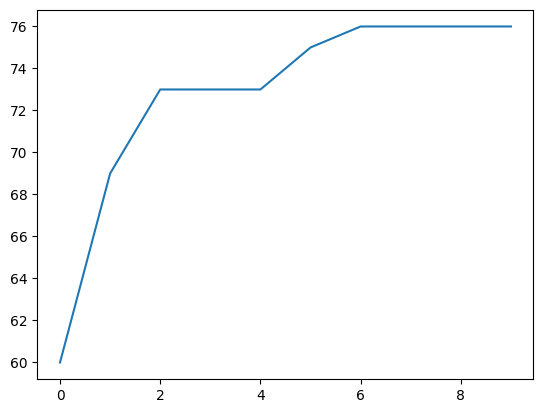

In [49]:
y = hist_fitness
x = [i for i in range(generation) if i % 10 == 0]
fig, ax = plt.subplots()

ax.plot(hist_fitness)